<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [14]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [15]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Task 1: Become familiar with the dataset


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in 1000's




## Task 2: Generate Descriptive Statistics and Visualizations

2.1 For the "Median value of owner-occupied homes" provide a boxplot

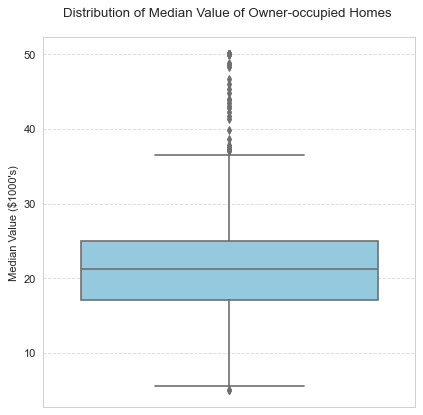

In [16]:
plt.figure(figsize=(6, 6), dpi=80)
ax = sns.boxplot(y='MEDV', data=boston_df, color='skyblue')
ax.set_title('Distribution of Median Value of Owner-occupied Homes \n')
ax.set_ylabel('Median Value ($1000\'s)')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

2.2 Provide a  bar plot for the Charles river variable

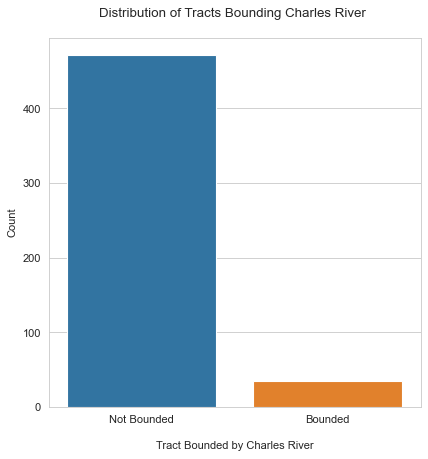

In [17]:
plt.figure(figsize=(6, 6), dpi=80)
sns.countplot(x='CHAS', data=boston_df)
plt.title('Distribution of Tracts Bounding Charles River \n')
plt.xlabel('\nTract Bounded by Charles River')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Bounded', 'Bounded'])
plt.show()

2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

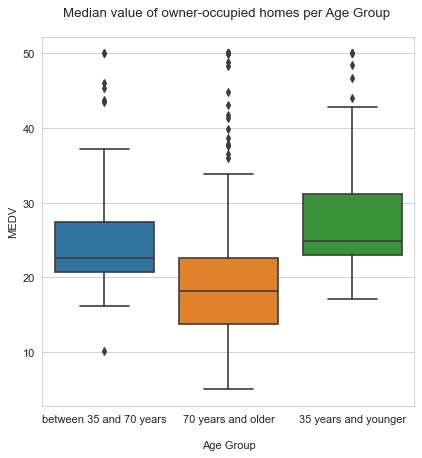

In [18]:
plt.figure(figsize=(6, 6), dpi=80)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
ax3 = sns.boxplot(y = 'MEDV', x = 'Age_Group', data = boston_df)
ax3.set_title('Median value of owner-occupied homes per Age Group \n')
plt.xlabel('\nAge Group')
plt.show()

2.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

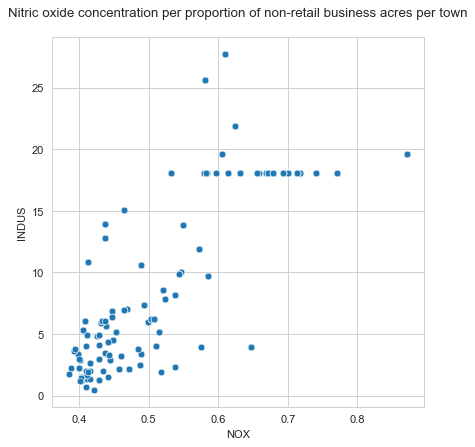

In [19]:
plt.figure(figsize=(6, 6), dpi=80)
ax4 = sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town\n')
plt.show()

**Scatter Plot Display:** By plotting a scatter graph, it can be observed that the concentration of nitrogen oxides (NOX) varies with the increase in the proportion of non-retail business acres per town (INDUS). Specifically, with an increase in the proportion of non-retail business acres, nitrogen oxide concentrations may show an increasing trend in certain cases.

**Relationship Analysis:** This trend may reflect different responses to environmental impacts due to changes in land use in urban planning. For instance, areas with higher proportions of non-retail business acres typically exhibit greater industrial activity or traffic density, which could lead to increased nitrogen oxide concentrations.

**Conclusion:** Therefore, there is a correlation between nitrogen oxide concentration (NOX) and the proportion of non-retail business acres (INDUS), showing a positive relationship.

2.5 Create a histogram for the pupil to teacher ratio variable

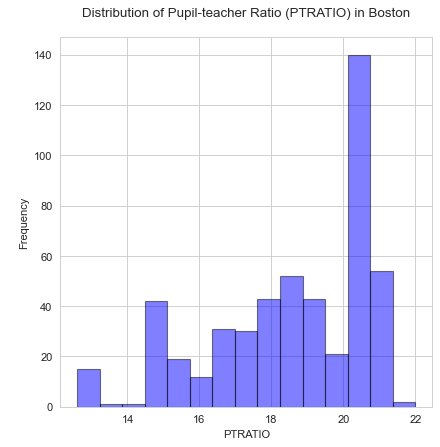

In [20]:
ptratio_data = boston_df['PTRATIO']
plt.figure(figsize=(6, 6),dpi=80)
plt.hist(ptratio_data, bins=15, edgecolor='black',color='blue', alpha=0.5)  
plt.title('Distribution of Pupil-teacher Ratio (PTRATIO) in Boston\n')
plt.xlabel('PTRATIO')
plt.ylabel('\nFrequency')
plt.grid(True)
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.

3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Define Hypotheses:**

Null Hypothesis (H₀): There is no significant difference in the median house values between houses bounded by the Charles River and those not bounded by the river.

Alternative Hypothesis (H₁): There is a significant difference in the median house values between houses bounded by the Charles River and those not bounded by the river.·

In [21]:
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV'] 
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']  
t_statistic, p_value = stats.ttest_ind(bounded, not_bounded, equal_var=False)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference in median house values between houses bounded and not bounded by Charles River.")
else:
    print("There is no significant difference in median house values between houses bounded and not bounded by Charles River.")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in median house values between houses bounded and not bounded by Charles River.


**Conclusion:** `There is a significant difference in median house values between houses bounded and not bounded by Charles River.`

3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [22]:

age_levels = boston_df['Age_Group'].unique()


medv_groups = []
for age_level in age_levels:
    medv_groups.append(boston_df[boston_df['Age_Group'] == age_level]['MEDV'])


f_statistic, p_value = stats.f_oneway(*medv_groups)


print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference in median house values (MEDV) across different levels of AGE.")
else:
    print("There is no significant difference in median house values (MEDV) across different levels of AGE.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
There is a significant difference in median house values (MEDV) across different levels of AGE.


**Conclusion:** `we reject the null hypothesis and conclude that there is a significant difference in median house values (MEDV) across different levels of AGE.`

3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Define Hypotheses:**

Null Hypothesis (H₀): There is no linear relationship between NOX and INDUS (correlation coefficient ρ=0).

Alternative Hypothesis (H₁): There is a linear relationship between NOX and INDUS (correlation coefficient ρ≠0).

In [23]:
nox_data = boston_df['NOX']
indus_data = boston_df['INDUS']
corr_coeff, p_value = stats.pearsonr(nox_data, indus_data)

print(f"Pearson correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")
alpha = 0.05 
if p_value > alpha:
    print("There is no significant relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).")
else:
    print("There is a significant relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).")

Pearson correlation coefficient: 0.7636514469209157
P-value: 7.913361061236247e-98
There is a significant relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).


**Conclusion:**  `The p-value is less than the significance level, we reject the null hypothesis and conclude that there is a significant positive correlation between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS) (Pearson correlation coefficient = 0.764, p-value = 7.91e-98). `

3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Define Hypotheses:**

Null Hypothesis (H₀): There is no linear relationship between DIS and MEDV .

Alternative Hypothesis (H₁): There is a linear relationship between DIS and MEDV.


In [24]:
X = boston_df['DIS']  
y = boston_df['MEDV'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        23:45:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:** `DIS (weighted distance to the five Boston employment centers) has a significant positive impact on the median value of homes (MEDV) in the Boston area. Specifically, for each additional unit increase in DIS, the median home value is expected to increase by approximately 1.09 units on average, which is statistically significant (p < 0.001). However, the model's R-squared value is relatively low (0.062), indicating that there are other factors not accounted for by the model that also influence the variation in MEDV.`